#1. 데이터 준비

In [2]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

mnist = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
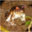

In [3]:
X_train[0]

#2. 이미지 확인

[16539 28900 16176  4834 41291 12361 46980 16777  9503]


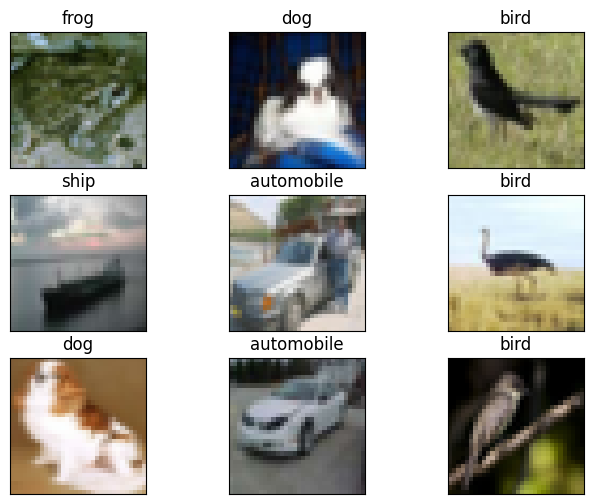

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

samples = np.random.randint(len(X_train), size = 9)
print(samples)
plt.figure(figsize = (8,6))
for i , idx in enumerate(samples):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  tra = X_train[idx]
  plt.imshow(tra, cmap ='gray')
  plt.title(class_names[y_train[idx][0]])
plt.show()

#3. 검증 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)


#4. 이미지 데이터의 정규화(최대-최소 정규화)

In [6]:
import numpy as np

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

print(np.max(X_train), np.min(X_train))

1.0 0.0


#5. Shape 변경
- 이미지 데이터를 Dense 레이어에 입력하기 위해 데이터를 batch num,  input num 형태로 변경

In [7]:
# X_train = (X_train.reshape((-1,28*28)))
# X_val = (X_val.reshape((-1,28*28)))
# X_test = (X_test.reshape((-1,28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


#5. 원- 핫 인코딩

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

#6. 모델 만들기

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

drop_rate = 0.2

def build_cnn_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(128, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [18]:
model = build_cnn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

#7. 컴파일
- 손실함수, 옵티마이저, 메트릭스 설정

In [19]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

#8. 학습

In [20]:
EPOCHS = 100
BATCH_SIZE =64

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    callbacks=[early_stopping])

Epoch 1/100
438/438 [==============================] - 10s 10ms/step - loss: 1.6142 - acc: 0.3996 - val_loss: 1.3464 - val_acc: 0.5224
Epoch 2/100
438/438 [==============================] - 3s 6ms/step - loss: 1.1700 - acc: 0.5791 - val_loss: 1.1325 - val_acc: 0.5931
Epoch 3/100
438/438 [==============================] - 3s 6ms/step - loss: 0.9671 - acc: 0.6597 - val_loss: 0.9650 - val_acc: 0.6679
Epoch 4/100
438/438 [==============================] - 3s 6ms/step - loss: 0.8020 - acc: 0.7189 - val_loss: 0.9281 - val_acc: 0.6904
Epoch 5/100
438/438 [==============================] - 3s 8ms/step - loss: 0.6761 - acc: 0.7655 - val_loss: 1.0201 - val_acc: 0.6650
Epoch 6/100
438/438 [==============================] - 3s 6ms/step - loss: 0.5550 - acc: 0.8052 - val_loss: 0.9233 - val_acc: 0.6980
Epoch 7/100
438/438 [==============================] - 3s 6ms/step - loss: 0.4444 - acc: 0.8441 - val_loss: 0.9801 - val_acc: 0.6961
Epoch 8/100
438/438 [==============================] - 3s 6ms/step 

#9. 학습곡선

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

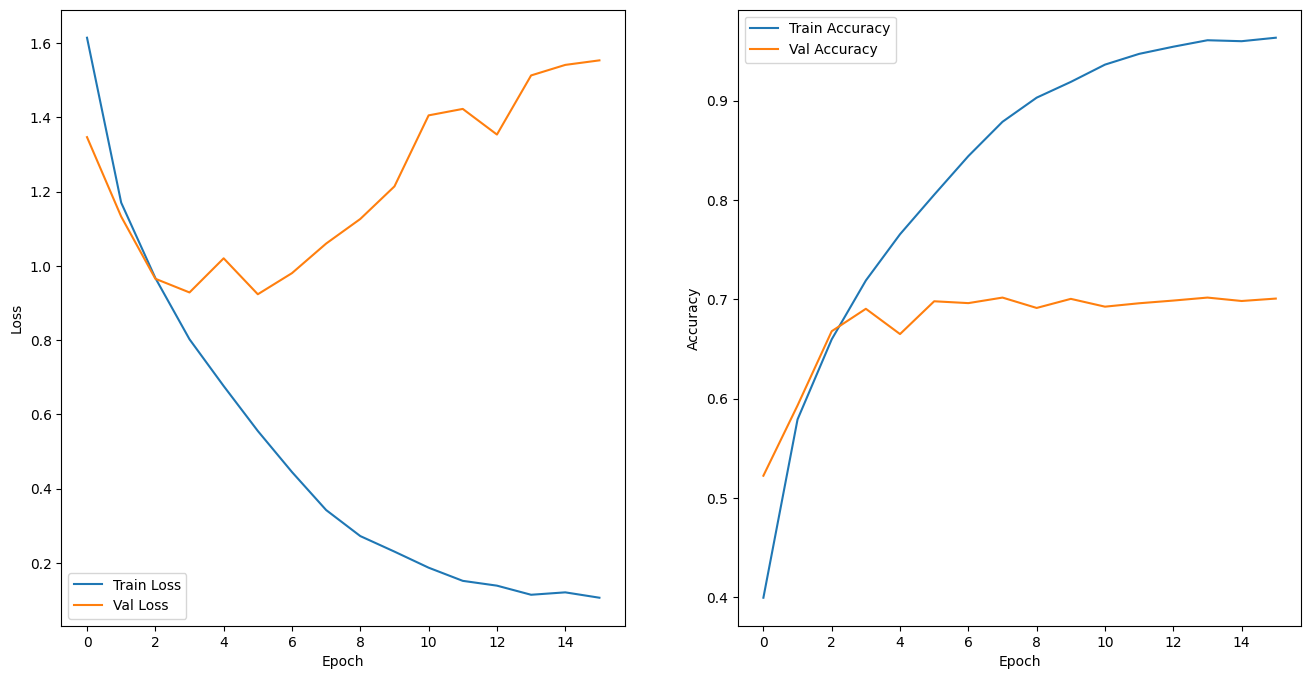

In [22]:
plot_history(history)

### Dropout 적용 (각층마다)

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

drop_rate = 0.2

def build_cnn_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(128, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [24]:
model = build_cnn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

In [25]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [26]:
EPOCHS = 100
BATCH_SIZE =64

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2,
                    callbacks=[early_stopping])

Epoch 1/100
438/438 [==============================] - 5s 8ms/step - loss: 1.6183 - acc: 0.3962 - val_loss: 1.4049 - val_acc: 0.5324
Epoch 2/100
438/438 [==============================] - 4s 9ms/step - loss: 1.1981 - acc: 0.5668 - val_loss: 1.1269 - val_acc: 0.6023
Epoch 3/100
438/438 [==============================] - 3s 7ms/step - loss: 1.0033 - acc: 0.6426 - val_loss: 1.0197 - val_acc: 0.6530
Epoch 4/100
438/438 [==============================] - 3s 7ms/step - loss: 0.8600 - acc: 0.6935 - val_loss: 0.9869 - val_acc: 0.6679
Epoch 5/100
438/438 [==============================] - 3s 7ms/step - loss: 0.7500 - acc: 0.7337 - val_loss: 0.9015 - val_acc: 0.6849
Epoch 6/100
438/438 [==============================] - 4s 8ms/step - loss: 0.6612 - acc: 0.7637 - val_loss: 0.8471 - val_acc: 0.7123
Epoch 7/100
438/438 [==============================] - 3s 7ms/step - loss: 0.5766 - acc: 0.7947 - val_loss: 0.8529 - val_acc: 0.7061
Epoch 8/100
438/438 [==============================] - 3s 7ms/step - 

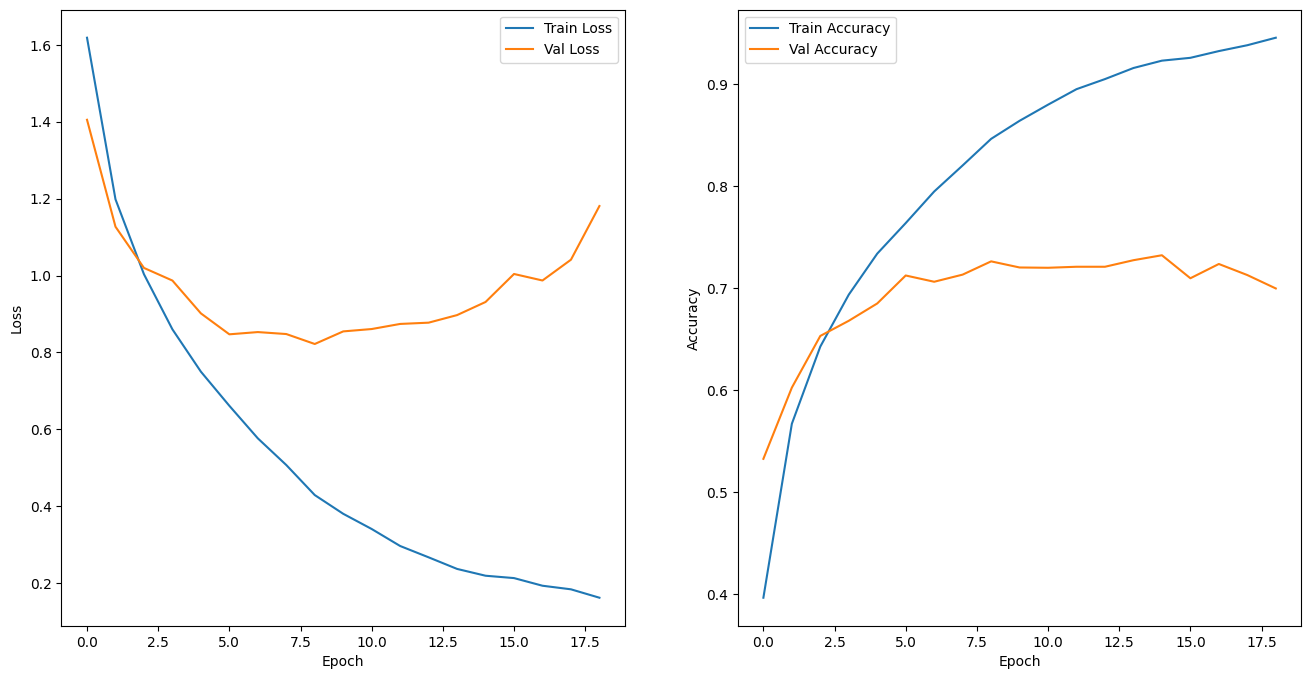

In [27]:
plot_history(history)

### 데이터 증강

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

train_datagen = ImageDataGenerator(
rescale = 1./ 255, #데이터에 제공된 값을 곱함
rotation_range = 20, # 무작위 회전에 대한 도(ㅇ) 단위 범위
width_shift_range = 0.1, #이미지를 수평으로 임의로 이동(전체 너비의 대칭)
height_shift_range = 0.1, #이미지를 수직으로 임의로 이동(전체 높이의 대칭)
zoom_range = 0.05, # 무작위 확대/축소 범위
horizontal_flip = True, #입력을 수평으로 랜덤하게 뒤집음
fill_mode = 'reflect') #One of {“constant”, “nearest”, “reflect” or “wrap”}, “nearest”가 기본
val_datagen = ImageDataGenerator(rescale=1./ 255)
test_datagen = ImageDataGenerator(rescale=1./ 255)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)


In [39]:
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [40]:
print(X_train.shape, y_train_oh.shape)
print(X_val.shape, y_val_oh.shape)

(35000, 32, 32, 3) (35000, 10)
(15000, 32, 32, 3) (15000, 10)


In [41]:
train_generator = train_datagen.flow(X_train, y_train_oh, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val_oh, batch_size=64)
test_generator = test_datagen.flow(X_test, y_test_oh, batch_size=64)

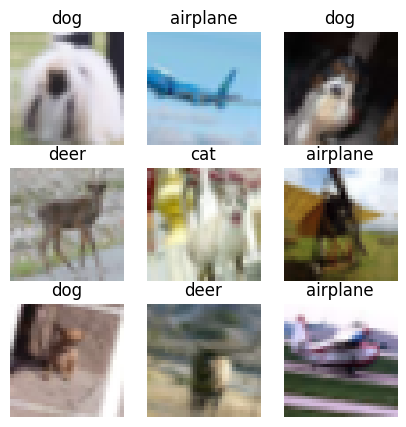

In [42]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)
images[0]
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plt.show()


In [54]:
from tensorflow import keras
from tensorflow.keras import layers

drop_rate = 0.2

def build_cnn_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(64, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(128, (3,3), input_shape=(32, 32, 3), padding="SAME", activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(256, (3,3), input_shape=(32, 32, 3), activation='relu'))
  model.add(layers.Dropout(drop_rate))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [55]:
model = build_cnn_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_34 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_35 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

In [56]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [59]:
EPOCHS = 100
BATCH_SIZE =64

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_generator,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=val_generator,
                    callbacks=[early_stopping])

Epoch 1/100
547/547 [==============================] - 24s 42ms/step - loss: 1.8578 - acc: 0.3117 - val_loss: 1.6974 - val_acc: 0.4356
Epoch 2/100
547/547 [==============================] - 23s 43ms/step - loss: 1.5493 - acc: 0.4300 - val_loss: 1.5091 - val_acc: 0.4914
Epoch 3/100
547/547 [==============================] - 25s 45ms/step - loss: 1.4472 - acc: 0.4708 - val_loss: 1.4255 - val_acc: 0.5313
Epoch 4/100
547/547 [==============================] - 26s 48ms/step - loss: 1.3483 - acc: 0.5091 - val_loss: 1.3549 - val_acc: 0.5563
Epoch 5/100
547/547 [==============================] - 23s 42ms/step - loss: 1.2710 - acc: 0.5406 - val_loss: 1.2436 - val_acc: 0.5997
Epoch 6/100
547/547 [==============================] - 22s 40ms/step - loss: 1.2023 - acc: 0.5717 - val_loss: 1.1549 - val_acc: 0.6234
Epoch 7/100
547/547 [==============================] - 23s 42ms/step - loss: 1.1372 - acc: 0.5910 - val_loss: 1.1537 - val_acc: 0.6183
Epoch 8/100
547/547 [==============================] - 

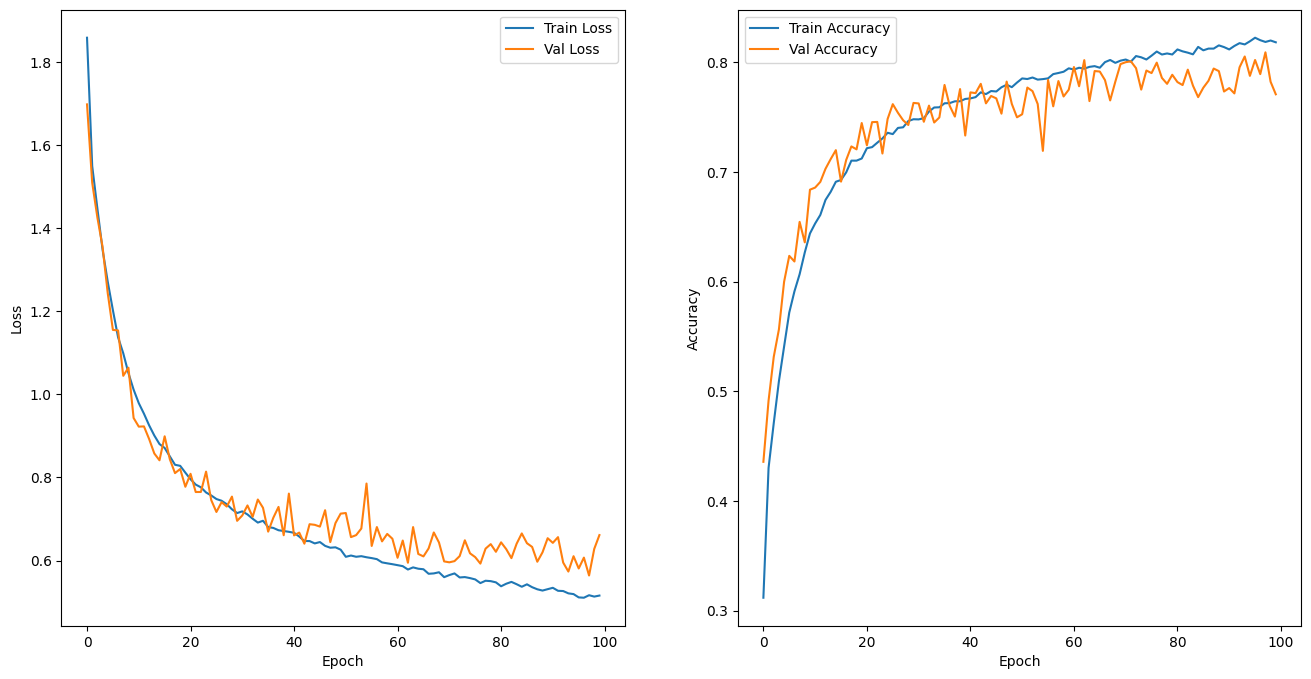

In [60]:
plot_history(history)

#10. 예측

In [61]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# loss, accuracy = model.evaluate(X_test, y_test_oh, verbose=2)
# print(f"Test loss: {loss:.2f}")
# print(f"Test accuracy: {accuracy:.2f}")


#11. 가장 높은 확률 인덱스 추출
- np.argmax()

In [63]:
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]


array([5, 8, 9, 1, 9, 9, 1, 6, 9, 1])

#12. 예측 결과의 이미지 표시

<Figure size 1600x600 with 0 Axes>

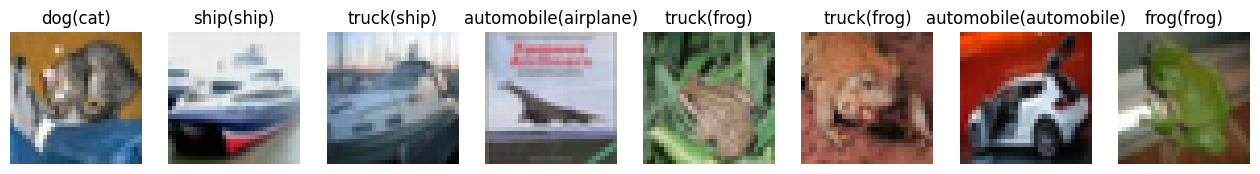

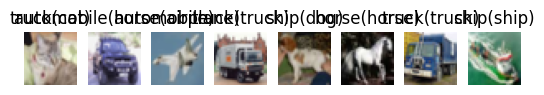

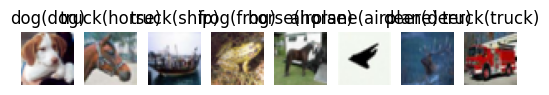

In [72]:
n_rows = 3
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index], cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index][0]]})')
  plt.show()

469/469 [==============================] - 1s 2ms/step


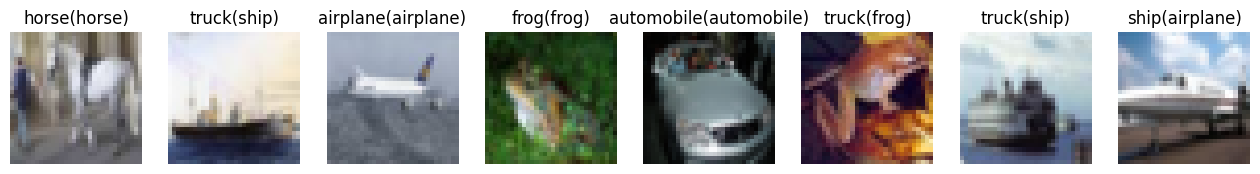

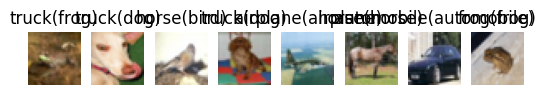

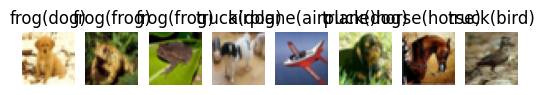

In [73]:
y_pred = model.predict(X_val)
y_pred[:1]
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]
n_rows = 3
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_val[index], cmap = 'gray')
    #plt.imshow(X_val[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_val[index][0]]})')
  plt.show()

### 결과 엉망
- Test, Valid 결과 출력 시, Test보다 Valid를 잘 분류하는 것으로 보아 과적합 가능성 존재